<a href="https://colab.research.google.com/github/willystw/fastai-learning/blob/modify-output/mnist-identification/Number_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initialization

The application uses fastai & pytorch library

In [38]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

### Download Raw Data

Raw data used here is from fastai course, because the data is in image format, and the image size is identical.

In [ ]:
path = untar_data(URLs.MNIST)

In [ ]:
Path.BASE_PATH = path

In [ ]:
path.ls()

(#2) [Path('training'),Path('testing')]

In [ ]:
(path/'training').ls()

(#10) [Path('training/7'),Path('training/8'),Path('training/5'),Path('training/4'),Path('training/6'),Path('training/3'),Path('training/2'),Path('training/9'),Path('training/1'),Path('training/0')]

In [ ]:
(path/'testing').ls()

(#10) [Path('testing/7'),Path('testing/8'),Path('testing/5'),Path('testing/4'),Path('testing/6'),Path('testing/3'),Path('testing/2'),Path('testing/9'),Path('testing/1'),Path('testing/0')]

In [ ]:
fours = (path/'training/4').ls().sorted()

In [ ]:
len(fours)

5842

In [ ]:
Image.open(fours[542])

## Init Variables

Store images data to a variable, then convert it to a tensor array.

In [ ]:
zeros = (path/'training/0').ls().sorted()
ones = (path/'training/1').ls().sorted()
twos = (path/'training/2').ls().sorted()
threes = (path/'training/3').ls().sorted()
fours = (path/'training/4').ls().sorted()
fives = (path/'training/5').ls().sorted()
sixes = (path/'training/6').ls().sorted()
sevens = (path/'training/7').ls().sorted()
eights = (path/'training/8').ls().sorted()
nines = (path/'training/9').ls().sorted()

In [ ]:
zero_tensor = [tensor(Image.open(o)) for o in zeros]
one_tensor = [tensor(Image.open(o)) for o in ones]
two_tensor = [tensor(Image.open(o)) for o in twos]
three_tensor = [tensor(Image.open(o)) for o in threes]
four_tensor = [tensor(Image.open(o)) for o in fours]
five_tensor = [tensor(Image.open(o)) for o in fives]
six_tensor = [tensor(Image.open(o)) for o in sixes]
seven_tensor = [tensor(Image.open(o)) for o in sevens]
eight_tensor = [tensor(Image.open(o)) for o in eights]
nine_tensor = [tensor(Image.open(o)) for o in nines]

In [ ]:
zero_stack = torch.stack(zero_tensor).float()/255.0
one_stack = torch.stack(one_tensor).float()/255.0
two_stack = torch.stack(two_tensor).float()/255.0
three_stack = torch.stack(three_tensor).float()/255.0
four_stack = torch.stack(four_tensor).float()/255.0
five_stack = torch.stack(five_tensor).float()/255.0
six_stack = torch.stack(six_tensor).float()/255.0
seven_stack = torch.stack(seven_tensor).float()/255.0
eight_stack = torch.stack(eight_tensor).float()/255.0
nine_stack = torch.stack(nine_tensor).float()/255.0

In [ ]:
zero_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/0').ls().sorted()]).float()/255.0
one_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/1').ls().sorted()]).float()/255.0
two_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/2').ls().sorted()]).float()/255.0
three_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/3').ls().sorted()]).float()/255.0
four_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/4').ls().sorted()]).float()/255.0
five_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/5').ls().sorted()]).float()/255.0
six_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/6').ls().sorted()]).float()/255.0
seven_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/7').ls().sorted()]).float()/255.0
eight_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/8').ls().sorted()]).float()/255.0
nine_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/9').ls().sorted()]).float()/255.0

t_tensors = [zero_t_tensor, one_t_tensor, two_t_tensor, three_t_tensor, four_t_tensor, 
            five_t_tensor, six_t_tensor, seven_t_tensor, eight_t_tensor, nine_t_tensor]

## Using Pixel Similarity Method

In this method, get average pixel value of a number. Then, calculate similarity with each number to determine which number is closest to prediction.

In [ ]:
mean0 = zero_stack.mean(0)
mean1 = one_stack.mean(0)
mean2 = two_stack.mean(0)
mean3 = three_stack.mean(0)
mean4 = four_stack.mean(0)
mean5 = five_stack.mean(0)
mean6 = six_stack.mean(0)
mean7 = seven_stack.mean(0)
mean8 = eight_stack.mean(0)
mean9 = nine_stack.mean(0)

means = [zero_stack.mean(0), one_stack.mean(0), two_stack.mean(0), three_stack.mean(0), four_stack.mean(0), 
         five_stack.mean(0), six_stack.mean(0), seven_stack.mean(0), eight_stack.mean(0), nine_stack.mean(0)]


Define distance function

In [ ]:
def distance(a,b) : return (a-b).abs().mean((-1,-2))

Use test data to get the function accuracy

In [ ]:
def get_accuracy(tensor_input, predicted_num):
    #init with true elements
    result = torch.ones(len(tensor_input), dtype=torch.bool)
    #get distance between input and predicted number's mean
    base = distance(tensor_input, means[predicted_num])
    #iterate 9 times to compare distance between input tensor and other available numbers.
    #skip if i is predicted_num
    #use logical and to accummulate the result
    for i in range(0,10):
        if i == predicted_num:
            continue
        d = distance(tensor_input, means[i])
        acc = base < d
        result = torch.logical_and(result, acc)
    return result


def get_accuracy_list(predicted_num):
    """Combine multiple get_accuracy functions into one function.
    Take data from t_tensors and iterate it.
    If the index of iteration is the same as predicted_num, use get_accuracy.
    Otherwise, use 1-get_accuracy to predict the chance of not predicted_num.
    Index 0 of the result is the correctness of test data compared with its predicted_num 
    """
    result = [get_accuracy(t_tensors[predicted_num], predicted_num).float().mean()]
    for i in range(0, 10):
        if i == predicted_num:
            continue
        pred = get_accuracy(t_tensors[i], predicted_num).float().mean()
        result.append((1 - pred))    
    return result

In [ ]:
for i in range(0,10):
    r = get_accuracy_list(i)
    print(f"Accuracy of number {i} is {r} with mean {torch.mean(torch.stack(r))}")


Accuracy of number 0 is [tensor(0.8153), tensor(1.), tensor(0.9835), tensor(0.9990), tensor(1.), tensor(0.9933), tensor(0.9906), tensor(0.9990), tensor(0.9887), tensor(0.9911)] with mean 0.9760535955429077
Accuracy of number 1 is [tensor(0.9982), tensor(0.9449), tensor(0.5678), tensor(0.6832), tensor(0.8320), tensor(0.6357), tensor(0.8455), tensor(0.8064), tensor(0.6191), tensor(0.8840)] with mean 0.781683087348938
Accuracy of number 2 is [tensor(0.4234), tensor(1.), tensor(1.), tensor(0.9950), tensor(1.), tensor(1.), tensor(0.9958), tensor(0.9981), tensor(1.), tensor(0.9990)] with mean 0.941138744354248
Accuracy of number 3 is [tensor(0.6089), tensor(0.9898), tensor(0.9991), tensor(0.9767), tensor(1.), tensor(0.8374), tensor(1.), tensor(1.), tensor(0.9476), tensor(0.9931)] with mean 0.9352714419364929
Accuracy of number 4 is [tensor(0.6680), tensor(0.9969), tensor(1.), tensor(0.9767), tensor(0.9990), tensor(0.9787), tensor(0.9614), tensor(0.9932), tensor(0.9908), tensor(0.9594)] with 

## Conclusion of Using Pixel Similarity Method

Most of the test result performs well, with mean > 0.90, although there are some concerns. Some test data does not perform well if tested with the correct number. For example, test 5 only has 0.2276 in confidence that the number tested is 5. For further improvement, test with other methods (e.g Stochastic Gradient Descent /SGD) to get better accuracy

## Using Stochastic Gradient Descent

Stochastic Gradient Descent (SGD) is a method to optimize objective function with suitable smoothness properties iteratively. The difference between SGD and gradient descent is that SGD uses mini-batch instead of processing all inputs at once, which makes SGD faster and cost efficient.


There are seven steps when trying to identify number using SGD:

1. Initialize weight with random value
1. Predict the number
1. Calculate the model loss (how far the prediction from actual result)
1. Calculate gradient, to measure new weight
1. Step(change) all the weight based on calculation
1. Go back to step 2, and repeat
1. Iterate until you decide to stop 

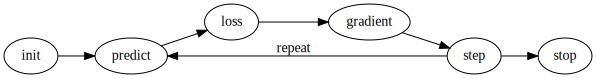

In [ ]:
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

### Mini-Batch
To split data into several batches, I use `DataLoader` class to load data, randomize the entry, and split the data into several batches.

In [39]:
train_x = torch.cat([zero_stack, one_stack,  two_stack, three_stack, four_stack, five_stack, six_stack, seven_stack, eight_stack, nine_stack]).view(-1, 28*28)
train_y = tensor([0]* len(zeros) + [1]* len(ones) + [2]* len(twos) + [3]* len(threes) + [4]* len(fours) + [5]* len(fives) + 
                 [6]* len(sixes) + [7]* len(sevens) + [8]* len(eights) + [9]* len(nines))
train_dl = DataLoader(list(zip(train_x, train_y)), batch_size=256)

In [40]:
validation_x = torch.cat([zero_t_tensor, one_t_tensor, two_t_tensor, three_t_tensor, four_t_tensor, five_t_tensor, 
                     six_t_tensor, seven_t_tensor, eight_t_tensor, nine_t_tensor]).view(-1, 28*28)
validation_y = tensor([0]* len(zero_t_tensor) + [1]* len(one_t_tensor) + [2]* len(two_t_tensor) + [3]* len(three_t_tensor) + [4]* len(four_t_tensor) + [5]* len(five_t_tensor) + 
                 [6]* len(six_t_tensor) + [7]* len(seven_t_tensor) + [8]* len(eight_t_tensor) + [9]* len(nine_t_tensor))
validation_dl = DataLoader(list(zip(validation_x, validation_y)), batch_size=256)

In the code above, I map the X axis with image tensors, and Y axis with numbering label to create training and validation datasets.

In [41]:
def train_epoch(model):
  result = []
  for xb, yb in train_dl:
    loss = calculate_gradient(xb, yb, model)
    for p in params:
      p.data -= p.grad * lr
      p.grad.zero_()
    result.append(loss.detach())
  return torch.stack(result).mean()

def calculate_gradient(xb, yb, model, loss_func=F.cross_entropy):
  preds = model(xb)
  loss = loss_func(preds, yb)
  loss.backward()

  return loss

def train_model(model, epochs):
    for i in range(epochs):
        loss = train_epoch(model)
        accuracy = validate_epoch(model)
        print(f"Loss: {loss}")
        print(f"Accuracy: {accuracy}")
        
def linear1(xb):
    return xb@w + b


In [42]:
def validate_epoch(model):
  accs = [batch_accuracy(model(xb), yb) for xb, yb in validation_dl]
  return round(torch.stack(accs).mean().item(), 4)

def batch_accuracy(result, yb):
  scores = result.softmax(1)
  accuracy = num_correct(scores, yb) / float(yb.size(0))
  return accuracy

def num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).float().sum()


I define several functions. `train_model` is the main method that will be used to view function loss and mode accuracy. In every epoch, functions `train_epoch` and `validate_epoch` is called sequentially. In `train_epoch`, the function will calculate gradient by using cross entropy.

In validation process, `batch_accuracy` will caluclate SoftMax distribution. This distribution determines probability of a numeric image detection result from number 0 to 9. In `num_correct`, the function will get which array index (array index is a representation of number result) has highest probability, and will be compared with actual result to test the model accuracy.

In [43]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

#Init variables with random values
w = init_params((28*28, 10))
b = init_params(10)

params = w , b
lr = 1.


In [49]:
#Print weight and bias before training
params

(tensor([[-0.4928, -1.4255, -0.2927,  ...,  0.7329, -1.7066, -0.0449],
         [-0.2082, -0.8302, -0.0835,  ..., -0.9769,  0.4104, -0.4193],
         [-0.0752,  0.1258, -0.2083,  ..., -0.8707,  0.2897, -0.2699],
         ...,
         [ 0.8049,  0.0775, -0.1371,  ..., -1.2666, -1.1943, -0.5013],
         [-0.9817, -0.5424, -1.2354,  ..., -0.2341, -0.3318, -0.5822],
         [ 1.5308,  1.8972,  0.7352,  ...,  0.2311, -0.3228,  0.1472]], requires_grad=True),
 tensor([-2.2794,  0.8107,  0.1559, -0.4761, -0.0702,  3.5993,  0.3713,  4.5749, -1.7764,  0.5655], requires_grad=True))

In [50]:
validate_epoch(linear1)

0.4982

In [53]:
train_model(linear1, 20)

Loss: 0.19902178645133972
Accuracy: 0.5076
Loss: 0.19693732261657715
Accuracy: 0.5086
Loss: 0.19496780633926392
Accuracy: 0.5096
Loss: 0.19310912489891052
Accuracy: 0.5105
Loss: 0.1913589984178543
Accuracy: 0.5119
Loss: 0.18971635401248932
Accuracy: 0.5137
Loss: 0.18817995488643646
Accuracy: 0.5154
Loss: 0.18674622476100922
Accuracy: 0.5159
Loss: 0.1854086071252823
Accuracy: 0.5166
Loss: 0.1841580867767334
Accuracy: 0.5183
Loss: 0.18298470973968506
Accuracy: 0.5188
Loss: 0.18187884986400604
Accuracy: 0.5198
Loss: 0.18083156645298004
Accuracy: 0.5217
Loss: 0.1798352301120758
Accuracy: 0.5223
Loss: 0.1788831502199173
Accuracy: 0.5232
Loss: 0.17796969413757324
Accuracy: 0.5242
Loss: 0.17708991467952728
Accuracy: 0.5246
Loss: 0.17623953521251678
Accuracy: 0.5252
Loss: 0.17541471123695374
Accuracy: 0.5261
Loss: 0.17461197078227997
Accuracy: 0.5266


In [52]:
# Print weight and bias after training
params

(tensor([[-0.4928, -1.4255, -0.2927,  ...,  0.7329, -1.7066, -0.0449],
         [-0.2082, -0.8302, -0.0835,  ..., -0.9769,  0.4104, -0.4193],
         [-0.0752,  0.1258, -0.2083,  ..., -0.8707,  0.2897, -0.2699],
         ...,
         [ 0.8049,  0.0775, -0.1371,  ..., -1.2666, -1.1943, -0.5013],
         [-0.9817, -0.5424, -1.2354,  ..., -0.2341, -0.3318, -0.5822],
         [ 1.5308,  1.8972,  0.7352,  ...,  0.2311, -0.3228,  0.1472]], requires_grad=True),
 tensor([-2.5713,  1.0068,  0.3734, -0.7523, -0.1599,  4.1913,  0.3311,  4.7359, -2.1798,  0.5001], requires_grad=True))